## Car Sales Price Prediction

Objective: Create a predictive model that can estimate the overall amount that consumers would spend given the following characteristics: customer name, customer email, country, gender, age, annual salary, credit card debt, and net worth.

In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let's embark on the journey of sales prediction using machine learning in Python.

Steps to follow:

1. Data Collection and preprocessing

2. Exploratory Data Analysis

3. Data Encoding

4. Model Implementation and Evaluation

5. Experimentation

### 1. Data Collection and preprocessing

The dataset used for this project can be found here: https://www.kaggle.com/datasets/yashpaloswal/ann-car-sales-price-prediction/data

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# importing models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import pickle
import warnings

warnings.simplefilter('ignore')

# importing evaluation metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_absolute_error,mean_squared_error,r2_score, accuracy_score

#from sklearn.metrics import roc_auc_score, plot_roc_curve

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
# load dataset
car_sales_df = pd.read_csv('car_purchasing.csv', encoding='ISO-8859-1')
car_sales_df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [3]:
# checking for the null values in the data
car_sales_df.isna().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [4]:
car_sales_df.dtypes

customer name           object
customer e-mail         object
country                 object
gender                   int64
age                    float64
annual Salary          float64
credit card debt       float64
net worth              float64
car purchase amount    float64
dtype: object

### 2. Exploratory Data Analysis

In [5]:
print("Total customer: ",len(car_sales_df['customer name'].value_counts()))

Total customer:  498


In [6]:
car_sales_df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


<Axes: >

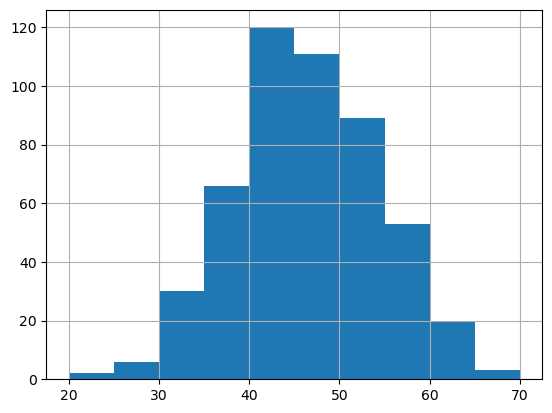

In [7]:
# distribution of age
car_sales_df.age.hist()

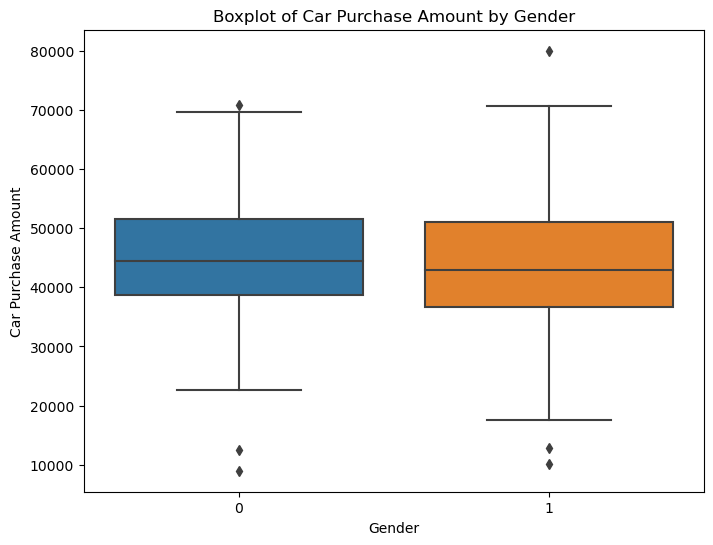

In [8]:
# plot for gender and car purchase amount
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='car purchase amount', data=car_sales_df)
plt.title('Boxplot of Car Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Car Purchase Amount')
plt.show()

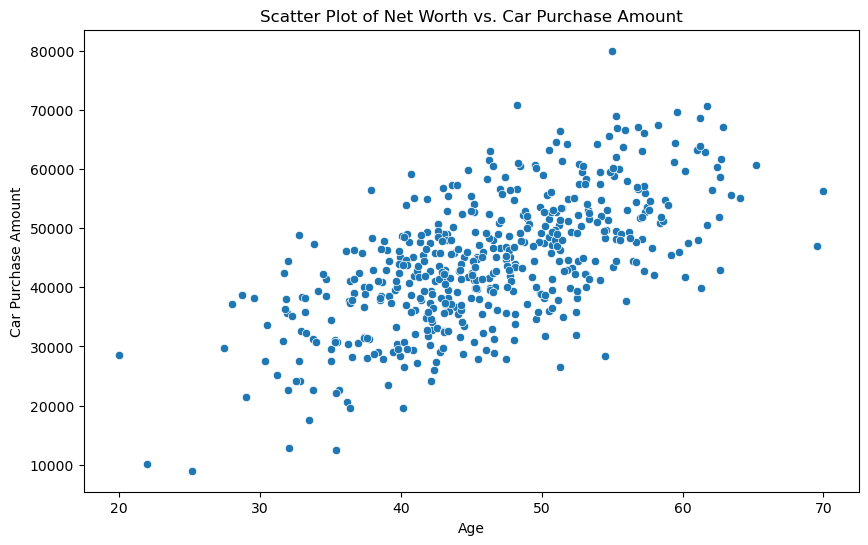

In [9]:
# Finding relation between age and car purchase amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='car purchase amount', data=car_sales_df)
plt.title('Scatter Plot of Net Worth vs. Car Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Car Purchase Amount')
plt.show()

array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'annual Salary'}>,
        <Axes: title={'center': 'credit card debt'}>],
       [<Axes: title={'center': 'net worth'}>,
        <Axes: title={'center': 'car purchase amount'}>]], dtype=object)

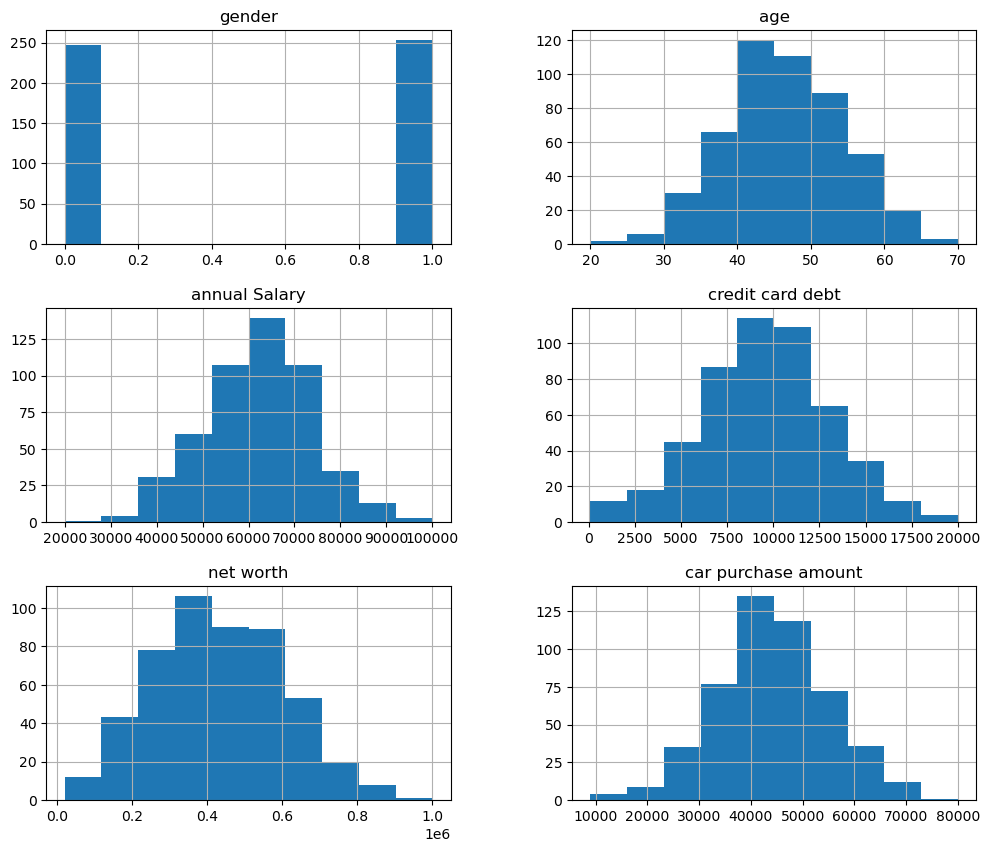

In [10]:
car_sales_df.hist(figsize = (12,10))

### 3. Model Implementation and Evaluation

In [11]:
# Since aim is to predict car purchase amount customer name, customer-email and country are not required so droping the columns
car_sales_df=car_sales_df.drop(columns=['customer name','customer e-mail','country'], axis=1)

In [12]:
car_sales_df.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [13]:
# Split the data into X and y
X=car_sales_df.drop("car purchase amount", axis=1)
y=car_sales_df["car purchase amount"]

In [14]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Machine learning models
models={
    'Linear Regression':LinearRegression(),
    'Random Forest Regressor':RandomForestRegressor(),
    'Lasso Regression':Lasso()
}

In [16]:
# function to fit and evaluate the models
def fit_and_evaluate(models,X_train,X_test,y_train,y_test):
    mse={}
    mae={}
    r2_scores={}
    for name,model in models.items():
#         Fit the model
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        # Calculate metrics
        mse[name] = mean_squared_error(y_test, y_pred)
        mae[name] = mean_absolute_error(y_test, y_pred)
        r2_scores[name] = r2_score(y_test, y_pred)
        
        print(f"Evaluating {name}")
        print('Mean Squared Error : ',mean_absolute_error(y_test, y_pred))
        print('Mean Absolute Error : ',mean_squared_error(y_test,y_pred))
        print('R2 Score',r2_score(y_test,y_pred))
        print('\n')
        
#         saving the models
        pickle.dump(model, open(f"{name}_model.pkl", "wb"))
    return mse, mae, r2_scores

In [17]:
mse_results, mae_results, r2_results=fit_and_evaluate(models=models, X_train=X_train,X_test=X_test,y_train=y_train ,y_test=y_test)

Evaluating Linear Regression
Mean Squared Error :  1.1535708944807994
Mean Absolute Error :  2.094369600950871
R2 Score 0.9999999806028682


Evaluating Random Forest Regressor
Mean Squared Error :  1610.2520193799978
Mean Absolute Error :  5381800.56800864
R2 Score 0.9501561259094


Evaluating Lasso Regression
Mean Squared Error :  1.1632003816343786
Mean Absolute Error :  2.0993488446128694
R2 Score 0.9999999805567527




 All models are performing well

Text(0.5, 1.0, 'Scatter plot of True vs Predicted Values')

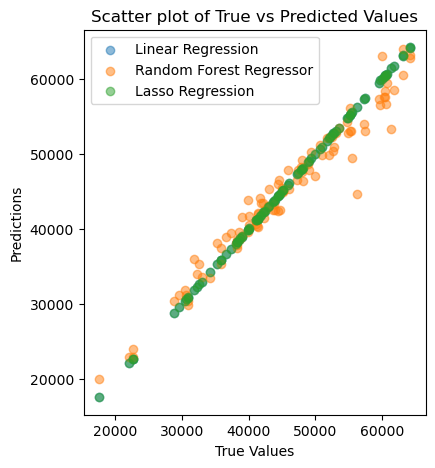

In [18]:
# Scatter plot
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
for name, model in models.items():
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, label=name, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.title('Scatter plot of True vs Predicted Values')

Lasso Regression and linear regression are giving ~100% accuracy as compare to Random Forest regressor.

Since lasso regression and linear regression have similar accuaracy I am going to implement linear regression for prediction

In [19]:
# function to predict new price for user input

# load the trained linear regression model
loaded_model=pickle.load(open('Linear Regression_model.pkl','rb'))



def pred_new_price():
    print("Enter the details of the customer:")
    gender=int(input("Enter the gender (0=Male, 1=Female): "))
    age=int(input("Enter the age: "))
    annual_salary=int(input("Enter the annual salary($): "))
    net_worth=int(input("Enter the net_worth($): "))
    credit_card_debt=int(input("Enter the credit card debt($):"))
    
    user_inputs=np.array([[gender, age, annual_salary, credit_card_debt,net_worth]])
    price_predict=loaded_model.predict(user_inputs)
    
    print(f"The predicted price of the car the customer will buy is: ${price_predict}")

In [20]:
pred_new_price()

Enter the details of the customer:
Enter the gender (0=Male, 1=Female): 1
Enter the age: 30
Enter the annual salary($): 90000
Enter the net_worth($): 90000
Enter the credit card debt($):1500
The predicted price of the car the customer will buy is: $[36318.2310418]
